In [134]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [135]:
df = pandas.read_csv('gamesPC.csv')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [137]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [138]:
categorical_columns = df.select_dtypes(include='object').columns
encoder = preprocessing.LabelEncoder()

le = LabelEncoder()
df['Name'] = encoder.fit_transform(df['Name'])
df['Platform'] = encoder.fit_transform(df['Platform'])
df['Genre'] = encoder.fit_transform(df['Genre'])
df['Publisher'] = df['Publisher'].apply(str)
df['Publisher'] = encoder.fit_transform(df['Publisher'])
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,11007,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9327,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5573,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,11009,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7346,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37


In [139]:
df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [140]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,11007,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9327,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5573,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,11009,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7346,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37


In [144]:
df1 = df
df1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,11007,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9327,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5573,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,11009,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7346,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37


In [145]:
#df1['Year'].value_counts()

In [165]:
df1['Year'] = df['Year'].astype(float)
df1 = df1.fillna(0)
df1['Year'].replace(0,df1['Year'].mean(axis=0),inplace=True)
df1.replace(0,df1.mean(axis=0),inplace=True)
df1.fillna(df1.mean())
df1['Year'] = df1.Year.astype(int)
df1['Year'].value_counts()

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1973     271
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [166]:
df1['Year'].mean()

2005.8610073502832

In [167]:
from sklearn.utils import shuffle 
df1 = shuffle(df1) 
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
812,814,11367.0,6.0,2001,11.0,275.0,1.640000,0.360000,0.077782,0.070000,2.07
6379,6381,3204.0,4.0,2010,11.0,359.0,0.264667,0.146652,0.270000,0.048063,0.27
7777,7779,8323.0,4.0,2010,3.0,275.0,0.110000,0.070000,0.077782,0.020000,0.19
4811,4813,680.0,7.0,2005,11.0,359.0,0.250000,0.070000,0.070000,0.010000,0.40
5753,5755,4601.0,10.0,1997,10.0,275.0,0.264667,0.146652,0.260000,0.050000,0.31
...,...,...,...,...,...,...,...,...,...,...,...
13735,13737,11404.0,23.0,1995,6.0,63.0,0.264667,0.146652,0.040000,0.048063,0.04
12296,12298,11326.0,19.0,2010,2.0,156.0,0.264667,0.146652,0.060000,0.048063,0.06
9258,9260,5514.0,26.0,2008,10.0,494.0,0.130000,0.146652,0.077782,0.010000,0.14
2025,2027,1102.0,28.0,2011,8.0,138.0,0.610000,0.320000,0.010000,0.080000,1.02


In [168]:
#df1 = df1.drop('index',1)
forest = RandomForestRegressor()
X = df1.values[:, 0:6]
Y = df1.values[:, 6]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)
forest.fit(trainX, trainY)
print('Accuracy: \n', forest.score(testX, testY))
pred = forest.predict(testX)

Accuracy: 
 0.9029893031851499


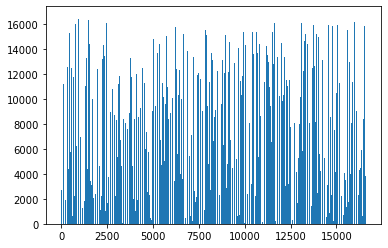

In [170]:
import matplotlib.pyplot as plt
import numpy as np
ind = np.arange(df1['Rank'].count())
plt.bar(ind, df1['Rank'])
plt.show()

In [174]:
from sklearn.cross_validation import train_test_split
forest = RandomForestClassifier()
X = df.values[:, 0:4]
Y = df.values[:, 4]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)
forest.fit(trainX, trainY)
print('Accuracy: \n', forest.score(testX, testY))
pred = forest.predict(testX)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
